# Predicting Christmas Movie Grossings

**📖 Background**

Imagine harnessing the power of data science to unveil the hidden potential of movies before they even hit the silver screen! As a data scientist at a forward-thinking cinema, you're at the forefront of an exhilarating challenge: crafting a cutting-edge system that doesn't just predict movie revenues, but reshapes the entire landscape of cinema profitability. This isn't just about numbers; it's about blending art with analytics to revolutionize how movies are marketed, chosen, and celebrated.

Your mission? To architect a predictive model that dives deep into the essence of a movie - from its title and running time to its genre, captivating description, and star-studded cast. And what better way to sprinkle some festive magic on this project than by focusing on a dataset brimming with Christmas movies? A highly-anticipated Christmas movie is due to launch soon, but the cinema has some doubts. It wants you to predict its success, so it can decide whether to go ahead with the screening or not. It's a unique opportunity to blend the cheer of the holiday season with the rigor of data science, creating insights that could guide the success of tomorrow's blockbusters. Ready to embark on this cinematic adventure?

## 💾 The data

We're providing you with a dataset of 788 Christmas movies, with the following columns:

* `christmas_movies.csv`

| Variable       | Description                                                             |
|----------------|-------------------------------------------------------------------------|
| `title`        | the title of the movie                                                  |
| `release_year` | year the movie was released                                             |
| `description`  | short description of the movie                                          |
| `type`         | the type of production e.g. Movie, TV Episode                           |
| `rating`       | the rating/certificate e.g. PG                                           |
| `runtime`      | the movie runtime in minutes                                            |
| `imdb_rating`  | the IMDB rating                                                         |
| `genre`        | list of genres e.g. Comedy, Drama etc.                                  |
| `director`     | the director of the movie                                               |
| `stars`        | list of actors in the movie                                             |
| `gross`        | the domestic gross of the movie in US dollars (what we want to predict) |

You may also use an additional dataset of 1000 high-rated movies, with the following columns:

* `imdb_top1k.csv`

| Variable       | Description                                                             |
|----------------|-------------------------------------------------------------------------|
| `title`        | the title of the movie                                                  |
| `release_year` | year the movie was released                                             |
| `description`  | short description of the movie                                          |
| `type`         | the type of production e.g. Movie, TV Episode                           |
| `rating`       | the ratig/certificate e.g. PG                                           |
| `runtime`      | the movie runtime in minutes                                            |
| `imdb_rating`  | the IMDB rating                                                         |
| `genre`        | list of genres e.g. Comedy, Drama etc.                                  |
| `director`     | the director of the movie                                               |
| `stars`        | list of actors in the movie                                             |
| `gross`        | the domestic gross of the movie in US dollars (what we want to predict) |

Finally you have access to a dataset of movie production budgets for over 6,000 movies, with the following columns:

* `movie_budgets.csv`

| Variable            | Meaning                         |
|---------------------|---------------------------------|
| `year`              | year the movie was released     |
| `date`              | date the movie was released     |
| `title`             | title of the movie              |
| `production budget` | production budget in US dollars |


**Note: while you may augment the Christmas movies with the general movie data, the model should be developed to predict ratings of Christmas movies only.**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
xmas = pd.read_csv("christmas_movies.csv")
imdb = pd.read_csv("imdb_top1k.csv")
budget = pd.read_csv("movie_budgets.csv")

In [3]:
xmas.head()

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",$59.70M
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",$71.32M
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...",NaN
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",$285.76M
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",$260.04M


In [4]:
imdb.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"4,360,000"


In [5]:
budget.head()

,year,date,title,production budget
0,2022.0,"Dec 9, 2022",Avatar: The Way of Water,460000000
1,2019.0,"Apr 23, 2019",Avengers: Endgame,400000000
2,2011.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000
3,2015.0,"Apr 22, 2015",Avengers: Age of Ultron,365000000
4,2023.0,"May 17, 2023",Fast X,340000000


>While diving into the movie dataset, it's clear that there's a bit of a puzzle with three tables, and the IMDb dataset is like the main character. To make things simpler and more organized, I suggest tweaking some column names. Now, for the exciting part - merging!
>
>We're putting together pieces from the other tables into our main IMDb dataset. Think of it like adding the 'budget' and 'genre' details to our movie story, making it more interesting and complete. This way, our dataset gets a boost with essential info about money matters and what kind of movie magic it's bringing to the screen.

In [6]:
imdb.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"4,360,000"


In [7]:
#renaming the columns to lowercase

imdb.columns = [col.lower() for col in imdb.columns]

In [8]:
print(imdb.columns)
print(xmas.columns)
print(budget.columns)

Index(['series_title', 'released_year', 'certificate', 'runtime', 'genre',
       'imdb_rating', 'overview', 'meta_score', 'director', 'star1', 'star2',
       'star3', 'star4', 'gross'],
      dtype='object')
Index(['title', 'release_year', 'description', 'type', 'rating', 'runtime',
       'imdb_rating', 'genre', 'director', 'stars', 'gross'],
      dtype='object')
Index(['year', 'date', 'title', 'production budget'], dtype='object')


Series_title and title are both the same, i'll move ono to edit series_title to match with other tables for \easy merging

In [9]:
imdb.columns

Index(['series_title', 'released_year', 'certificate', 'runtime', 'genre',
       'imdb_rating', 'overview', 'meta_score', 'director', 'star1', 'star2',
       'star3', 'star4', 'gross'],
      dtype='object')

In [10]:
new_columns = ['title', 'release_year', 'cert', 'runtime', 'genre',
       'imdb_rating', 'overview', 'meta_score', 'director', 'star1', 'star2',
       'star3', 'star4', 'gross']

In [11]:
imdb.columns = new_columns

In [12]:
imdb.head()

,title,release_year,cert,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"4,360,000"


In [13]:
imdb.runtime = imdb.runtime.str.strip(' min').astype('float')

The gross value are not in the right datatype, it needs conversion but first striping of the comma

In [14]:
imdb.gross.dtype

dtype('O')

In [15]:
def clean_imdb_gross(value):
    value = str(value).replace(',','')
    
    return float(value)

In [16]:
imdb.gross = imdb.gross.apply(clean_imdb_gross)

In [17]:
xmas.head()

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",$59.70M
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",$71.32M
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...",NaN
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",$285.76M
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",$260.04M


The gross value in the xmas dataset needs some edit also as the values are not in the right data type. The dollar sign can be removed and the M converted by multiplying it with 10^6

In [18]:
def clean_xmas_gross(value):
    value = str(value).strip("$M")
    
    return (float(value) * 10**6)

In [19]:
xmas.gross = xmas.gross.apply(clean_xmas_gross)

In [20]:
xmas.head()

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",59700000.0
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",71320000.0
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...",NaN
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",285760000.0
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",260040000.0


In [21]:
budget.head()

,year,date,title,production budget
0,2022.0,"Dec 9, 2022",Avatar: The Way of Water,460000000
1,2019.0,"Apr 23, 2019",Avengers: Endgame,400000000
2,2011.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000
3,2015.0,"Apr 22, 2015",Avengers: Age of Ultron,365000000
4,2023.0,"May 17, 2023",Fast X,340000000


In [22]:
new_columns = ['release_year', 'date', 'title', 'prod_budget']

In [23]:
budget.columns = new_columns

In [24]:
imdb['release_year'] = pd.to_numeric(imdb['release_year'], errors='coerce')

In [25]:
print(xmas.columns)
print(imdb.columns)
print(budget.columns)

Index(['title', 'release_year', 'description', 'type', 'rating', 'runtime',
       'imdb_rating', 'genre', 'director', 'stars', 'gross'],
      dtype='object')
Index(['title', 'release_year', 'cert', 'runtime', 'genre', 'imdb_rating',
       'overview', 'meta_score', 'director', 'star1', 'star2', 'star3',
       'star4', 'gross'],
      dtype='object')
Index(['release_year', 'date', 'title', 'prod_budget'], dtype='object')


In [26]:
merged_df = pd.merge(xmas, imdb, on=['title', 'release_year'], how = 'outer')
merged_df = pd.merge(merged_df, budget, on=['title', 'release_year'], how = 'outer')

In [27]:
merged_df

,title,release_year,description,type,rating,runtime_x,imdb_rating_x,genre_x,director_x,stars,...,overview,meta_score,director_y,star1,star2,star3,star4,gross_y,date,prod_budget
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Nov 7, 2003",45000000.0
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",...,An eight-year-old troublemaker must protect hi...,63.0,Chris Columbus,Macaulay Culkin,Joe Pesci,Daniel Stern,John Heard,285761243.0,"Nov 16, 1990",15000000.0
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Nov 17, 2000",123000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7694,Following,1999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Apr 2, 1999",6000.0
7695,Return to the Land of Wonders,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 13, 2005",5000.0
7696,A Plague So Pleasant,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sep 29, 2015",1400.0
7697,My Date With Drew,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Aug 5, 2005",1100.0


In [28]:
merged_df.isna().sum()

title               0
release_year      121
description      6911
type             6911
rating           7053
runtime_x        6950
imdb_rating_x    6950
genre_x          6912
director_x       6916
stars            6923
gross_x          7618
cert             6800
runtime_y        6699
genre_y          6699
imdb_rating_y    6699
overview         6699
meta_score       6856
director_y       6699
star1            6699
star2            6699
star3            6699
star4            6699
gross_y          6868
date             1259
prod_budget      1259
dtype: int64

In [29]:
merged_df.drop(columns=['runtime_x','imdb_rating_x','genre_x','director_x','gross_x', 'stars'], inplace = True)

In [30]:
merged_df.columns

Index(['title', 'release_year', 'description', 'type', 'rating', 'cert',
       'runtime_y', 'genre_y', 'imdb_rating_y', 'overview', 'meta_score',
       'director_y', 'star1', 'star2', 'star3', 'star4', 'gross_y', 'date',
       'prod_budget'],
      dtype='object')

In [31]:
new_columns = ['title', 'release_year', 'desc', 'type', 'rating', 'cert',
       'runtime', 'genre', 'imdb_rating', 'overview', 'meta_score',
       'director', 'star1', 'star2', 'star3', 'star4', 'gross', 'date',
       'prod_budget']

In [32]:
merged_df.columns = new_columns

In [33]:
merged_df.head(2)

,title,release_year,desc,type,rating,cert,runtime,genre,imdb_rating,overview,meta_score,director,star1,star2,star3,star4,gross,date,prod_budget
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Nov 7, 2003",45000000.0
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
merged_df.type.value_counts()

Movie         775
TV Episode     13
Name: type, dtype: int64

In [35]:
mode_type = merged_df.type.mode()[0]
merged_df.type.fillna(mode_type,inplace = True)

mode_rating = merged_df.rating.mode()[0]
merged_df.rating.fillna(mode_rating,inplace = True)

mode_cert = merged_df.cert.mode()[0]
merged_df.cert.fillna(mode_cert,inplace = True)

In [36]:
merged_df.isna().sum()

title              0
release_year     121
desc            6911
type               0
rating             0
cert               0
runtime         6699
genre           6699
imdb_rating     6699
overview        6699
meta_score      6856
director        6699
star1           6699
star2           6699
star3           6699
star4           6699
gross           6868
date            1259
prod_budget     1259
dtype: int64

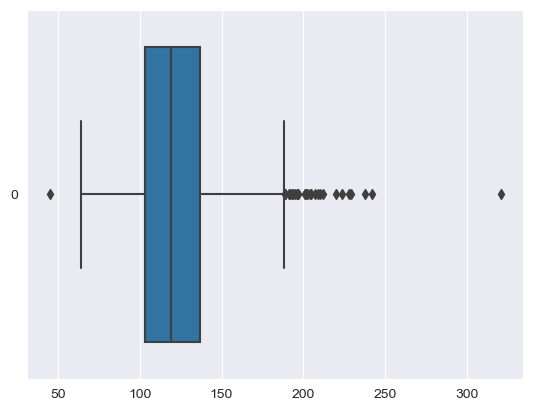

In [37]:
sns.set_style('darkgrid')
sns.boxplot(merged_df['runtime'], orient = 'h')
plt.show()

In [38]:
median_runtime = merged_df.runtime.median()
merged_df.runtime.fillna(median_runtime, inplace = True)

mode_genre = merged_df.genre.mode()[0]
merged_df.genre.fillna(mode_genre, inplace = True)

median_imdb_rating = merged_df.imdb_rating.median()
merged_df.imdb_rating.fillna(median_imdb_rating, inplace = True)

median_meta_score = merged_df.meta_score.median()
merged_df.meta_score.fillna(median_meta_score, inplace = True)

mode_director = merged_df.director.mode()
merged_df.director.fillna(mode_director, inplace = True)

mode_star1 = merged_df.star1.mode()
merged_df.star1.fillna(mode_star1, inplace = True)

mode_star2 = merged_df.star2.mode()
merged_df.star2.fillna(mode_star2, inplace = True)

mode_star3 = merged_df.star3.mode()
merged_df.star3.fillna(mode_star3, inplace = True)

mode_star4 = merged_df.star4.mode()
merged_df.star4.fillna(mode_star4, inplace = True)

median_gross = merged_df.gross.median()
merged_df.gross.fillna(median_gross, inplace = True)



In [39]:
mode_director = merged_df.director.mode()
merged_df.director.fillna(mode_director, inplace = True)

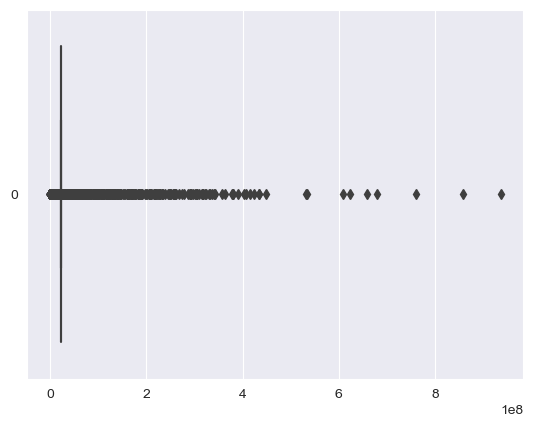

In [40]:
sns.set_style('darkgrid')
sns.boxplot(merged_df['gross'], orient = 'h')
plt.show()

In [41]:
merged_df.isna().sum()

title              0
release_year     121
desc            6911
type               0
rating             0
cert               0
runtime            0
genre              0
imdb_rating        0
overview        6699
meta_score         0
director        6698
star1           6698
star2           6698
star3           6698
star4           6698
gross              0
date            1259
prod_budget     1259
dtype: int64

In [42]:
merged_df.drop(columns=['desc','overview'],inplace=True)

In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7699 entries, 0 to 7698
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         7699 non-null   object 
 1   release_year  7578 non-null   float64
 2   type          7699 non-null   object 
 3   rating        7699 non-null   object 
 4   cert          7699 non-null   object 
 5   runtime       7699 non-null   float64
 6   genre         7699 non-null   object 
 7   imdb_rating   7699 non-null   float64
 8   meta_score    7699 non-null   float64
 9   director      1001 non-null   object 
 10  star1         1001 non-null   object 
 11  star2         1001 non-null   object 
 12  star3         1001 non-null   object 
 13  star4         1001 non-null   object 
 14  gross         7699 non-null   float64
 15  date          6440 non-null   object 
 16  prod_budget   6440 non-null   float64
dtypes: float64(6), object(11)
memory usage: 1.3+ MB


In [44]:
merged_df.dropna(inplace=True)

In [45]:
merged_df

,title,release_year,type,rating,cert,runtime,genre,imdb_rating,meta_score,director,star1,star2,star3,star4,gross,date,prod_budget
0,Love Actually,2003.0,Movie,R,U,119.0,Drama,7.9,79.0,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,23530892.0,"Nov 7, 2003",45000000.0
3,Home Alone,1990.0,Movie,PG,U,103.0,"Comedy, Family",7.6,63.0,Chris Columbus,Macaulay Culkin,Joe Pesci,Daniel Stern,John Heard,285761243.0,"Nov 16, 1990",15000000.0
6,It's a Wonderful Life,1946.0,Movie,PG,PG,130.0,"Drama, Family, Fantasy",8.6,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,23530892.0,"Dec 20, 1946",3180000.0
8,Die Hard,1988.0,Movie,R,A,132.0,"Action, Thriller",8.2,72.0,John McTiernan,Bruce Willis,Alan Rickman,Bonnie Bedelia,Reginald VelJohnson,83008852.0,"Jul 15, 1988",28000000.0
14,Klaus,2019.0,Movie,PG,PG,96.0,"Animation, Adventure, Comedy",8.2,65.0,Sergio Pablos,Carlos Martínez López,Jason Schwartzman,J.K. Simmons,Rashida Jones,23530892.0,"Nov 8, 2019",40000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,The Muppet Movie,1979.0,Movie,TV-G,U,95.0,"Adventure, Comedy, Family",7.6,74.0,James Frawley,Jim Henson,Frank Oz,Jerry Nelson,Richard Hunt,76657000.0,"Jun 22, 1979",8000000.0
1759,Escape from Alcatraz,1979.0,Movie,TV-G,A,112.0,"Action, Biography, Crime",7.6,76.0,Don Siegel,Clint Eastwood,Patrick McGoohan,Roberts Blossom,Jack Thibeau,43000000.0,"Jun 22, 1979",8000000.0
1762,Close Encounters of the Third Kind,1977.0,Movie,TV-G,U,138.0,"Drama, Sci-Fi",7.6,90.0,Steven Spielberg,Richard Dreyfuss,François Truffaut,Teri Garr,Melinda Dillon,132088635.0,"Nov 16, 1977",20000000.0
1768,A Hard Day's Night,1964.0,Movie,TV-G,U,87.0,"Comedy, Music, Musical",7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,13780024.0,"Aug 11, 1964",560000.0


In [46]:
merged_df.columns

Index(['title', 'release_year', 'type', 'rating', 'cert', 'runtime', 'genre',
       'imdb_rating', 'meta_score', 'director', 'star1', 'star2', 'star3',
       'star4', 'gross', 'date', 'prod_budget'],
      dtype='object')

In [47]:
merged_df.describe()

,release_year,runtime,imdb_rating,meta_score,gross,prod_budget
count,485.000000,485.000000,485.000000,485.000000,4.850000e+02,4.850000e+02
mean,1997.103093,126.432990,7.940619,77.315464,9.663341e+07,4.261440e+07
std,18.412898,28.004319,0.301065,11.979384,1.184484e+08,5.682645e+07
min,1933.000000,80.000000,7.600000,28.000000,8.386100e+04,2.700000e+04
25%,1989.000000,106.000000,7.700000,70.000000,2.249449e+07,6.900000e+06
50%,2002.000000,122.000000,7.900000,79.000000,5.209648e+07,2.000000e+07
75%,2011.000000,139.000000,8.100000,86.000000,1.301646e+08,5.000000e+07
max,2020.000000,242.000000,9.300000,100.000000,8.583730e+08,4.000000e+08


In [48]:
merged_df.release_year = merged_df.release_year.astype('int')

In [49]:
year_sum = merged_df.groupby('release_year').sum().sort_values(by='gross').tail(5)

In [50]:
year_sum

,runtime,imdb_rating,meta_score,gross,prod_budget
release_year,,,,,
2019,1806.0,111.7,1067.0,2.157376e+09,1.126600e+09
2010,1592.0,111.3,1059.0,2.169767e+09,1.096800e+09
2012,1802.0,110.9,1075.0,2.535797e+09,1.362650e+09
2014,2362.0,150.7,1484.0,2.576374e+09,1.595700e+09
2009,1789.0,117.0,1099.0,2.908489e+09,1.336100e+09


In [51]:
list(year_sum.index)

[2019, 2010, 2012, 2014, 2009]

In [52]:
def lineplot(x,y,xlabel,ylabel,title):
    sns.set()
    plt.figure(figsize=(10,6))
    sns.lineplot(x=x,y=y,marker='o')
    plt.xlabel(xlabel,fontweight='bold')
    plt.ylabel(ylabel,fontweight='bold')
    plt.title(title,fontweight='bold')
    plt.xticks(rotation=45)
    plt.xticks(range(2009, 2020))
    plt.show()

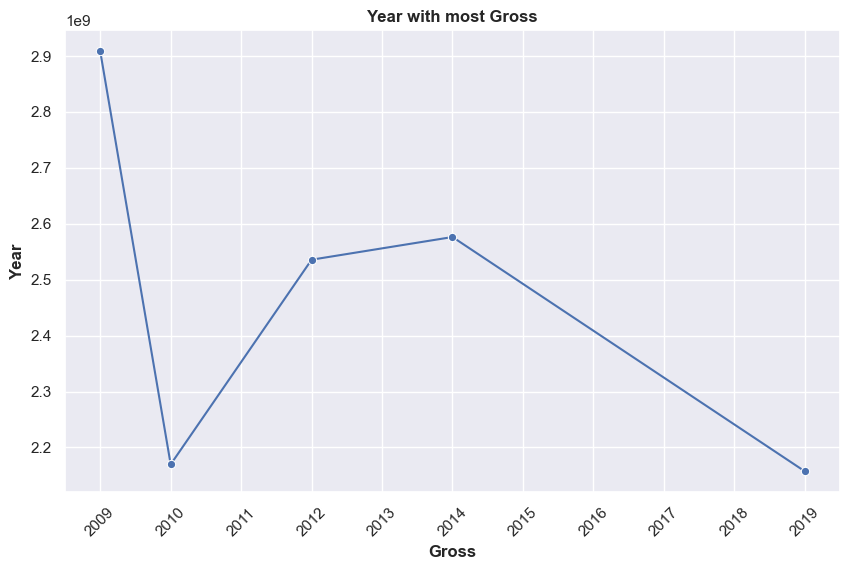

In [53]:
lineplot(list(year_sum.index),year_sum["gross"],"Gross","Year","Year with most Gross")

In [54]:
year_sum = merged_df.groupby('release_year').sum().sort_values(by='prod_budget').tail(5)

In [55]:
year_sum

,runtime,imdb_rating,meta_score,gross,prod_budget
release_year,,,,,
2010,1592.0,111.3,1059.0,2.169767e+09,1.096800e+09
2019,1806.0,111.7,1067.0,2.157376e+09,1.126600e+09
2009,1789.0,117.0,1099.0,2.908489e+09,1.336100e+09
2012,1802.0,110.9,1075.0,2.535797e+09,1.362650e+09
2014,2362.0,150.7,1484.0,2.576374e+09,1.595700e+09


In [56]:
list(year_sum.index)

[2010, 2019, 2009, 2012, 2014]

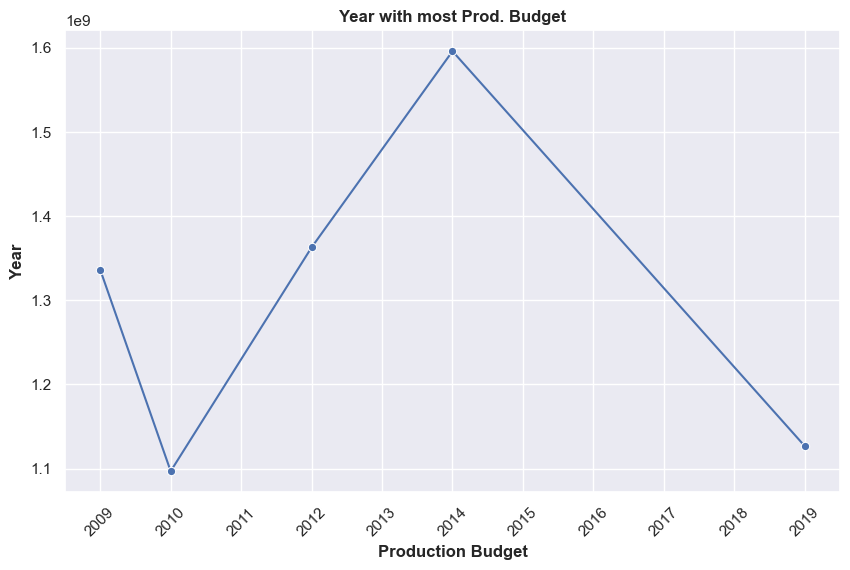

In [57]:
lineplot(list(year_sum.index),year_sum["prod_budget"],"Production Budget","Year","Year with most Prod. Budget")

In [58]:
x = merged_df.type.value_counts()

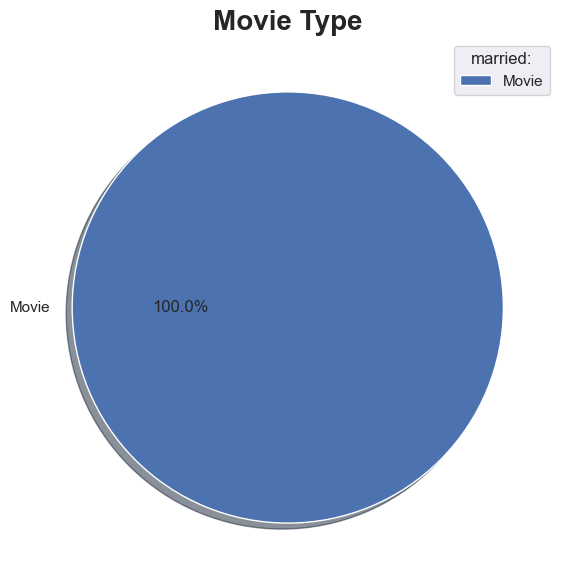

In [60]:
plt.figure(figsize=(10,7))
plt.pie(x,labels=x.keys(),autopct="%1.1f%%",pctdistance=0.5,shadow=True)
plt.title("Movie Type",fontweight="bold",fontsize="20",loc="center")
plt.legend(title='married:',loc ="best")
plt.show()

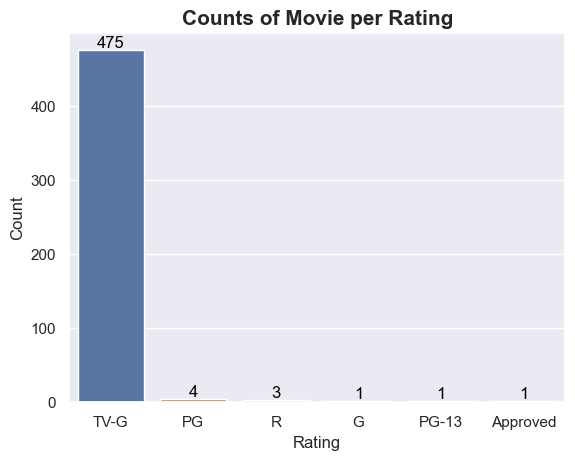

In [150]:
sns.barplot(x=merged_df.rating.value_counts().keys(),y=merged_df.rating.value_counts())

# Annotate the bars with their counts
for i, v in enumerate(merged_df['rating'].value_counts()):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', color='black')
    
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Counts of Movie per Rating',fontweight="bold",fontsize="15")

# Show the plot
plt.show()

In [105]:
merged_df.cert.value_counts()

U           123
A           121
UA          112
R            78
PG-13        21
PG           15
G             7
Passed        4
Approved      3
U/A           1
Name: cert, dtype: int64

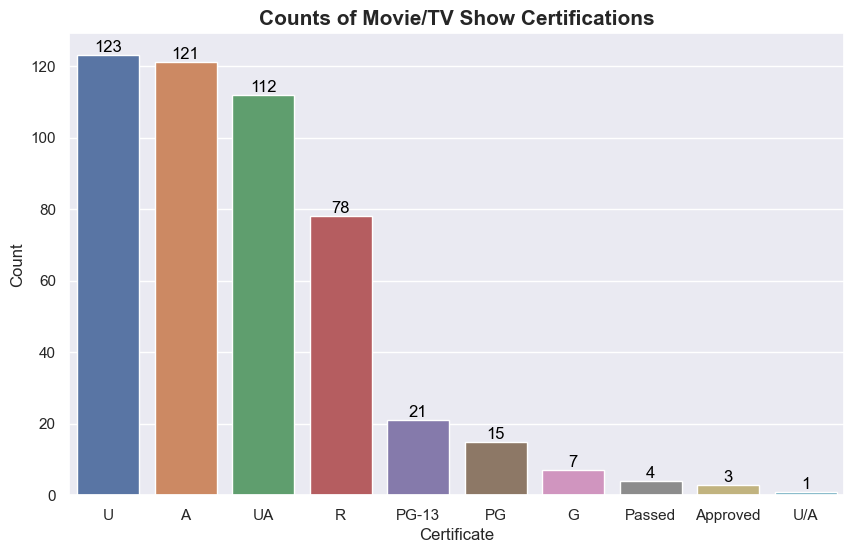

In [111]:
plt.figure(figsize=(10,6))
sns.barplot(x=merged_df.cert.value_counts().keys(),y=merged_df.cert.value_counts())

# Annotate the bars with their counts
for i, v in enumerate(merged_df['cert'].value_counts()):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom', color='black')
    
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.title('Counts of Movie/TV Show Certifications',fontweight="bold",fontsize="15")

# Show the plot
plt.show()

In [133]:
runtime_mean = merged_df.groupby('genre')['runtime'].mean().reset_index().sort_values(by="runtime").tail(5)

runtime_mean

,genre,runtime
97,"Drama, Family, Musical",181.000000
86,"Crime, Drama, Fantasy",189.000000
35,"Adventure, Drama, History",189.666667
27,"Adventure, Biography, Drama",191.500000
102,"Drama, History, Romance",238.000000


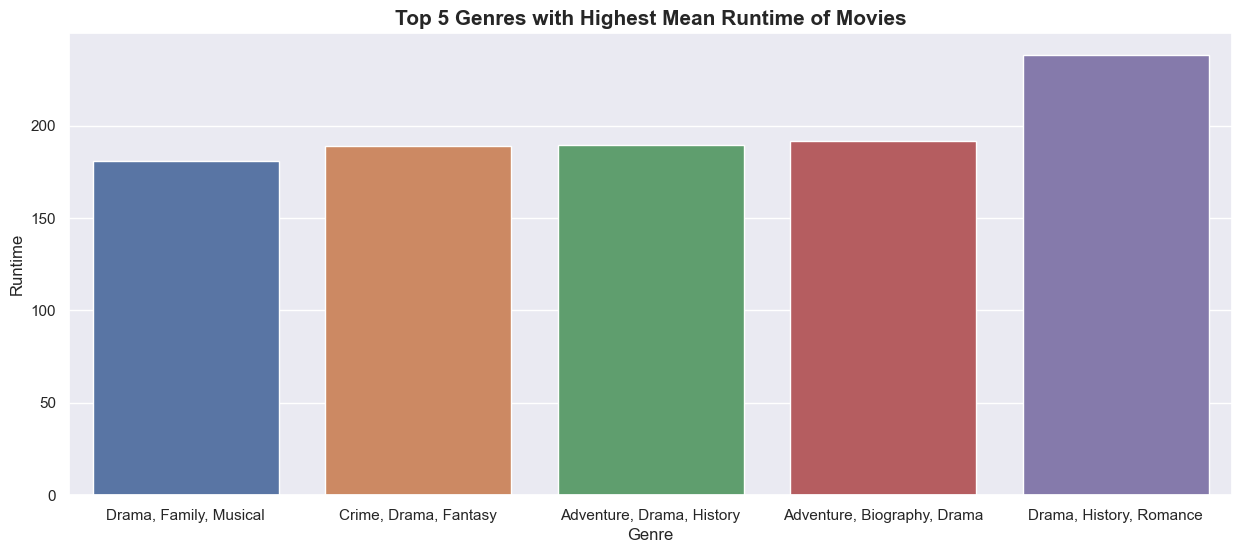

In [154]:
plt.figure(figsize=(15,6))
sns.barplot(x = runtime_mean['genre'], y = runtime_mean['runtime'])

plt.title("Top 5 Genres with Highest Mean Runtime of Movies",fontweight="bold",fontsize="15")

plt.xlabel("Genre")
plt.ylabel("Runtime")

plt.show()

In [152]:
merged_df

,title,release_year,type,rating,cert,runtime,genre,imdb_rating,meta_score,director,star1,star2,star3,star4,gross,date,prod_budget
0,Love Actually,2003,Movie,R,U,119.0,Drama,7.9,79.0,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,23530892.0,"Nov 7, 2003",45000000.0
3,Home Alone,1990,Movie,PG,U,103.0,"Comedy, Family",7.6,63.0,Chris Columbus,Macaulay Culkin,Joe Pesci,Daniel Stern,John Heard,285761243.0,"Nov 16, 1990",15000000.0
6,It's a Wonderful Life,1946,Movie,PG,PG,130.0,"Drama, Family, Fantasy",8.6,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,23530892.0,"Dec 20, 1946",3180000.0
8,Die Hard,1988,Movie,R,A,132.0,"Action, Thriller",8.2,72.0,John McTiernan,Bruce Willis,Alan Rickman,Bonnie Bedelia,Reginald VelJohnson,83008852.0,"Jul 15, 1988",28000000.0
14,Klaus,2019,Movie,PG,PG,96.0,"Animation, Adventure, Comedy",8.2,65.0,Sergio Pablos,Carlos Martínez López,Jason Schwartzman,J.K. Simmons,Rashida Jones,23530892.0,"Nov 8, 2019",40000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,The Muppet Movie,1979,Movie,TV-G,U,95.0,"Adventure, Comedy, Family",7.6,74.0,James Frawley,Jim Henson,Frank Oz,Jerry Nelson,Richard Hunt,76657000.0,"Jun 22, 1979",8000000.0
1759,Escape from Alcatraz,1979,Movie,TV-G,A,112.0,"Action, Biography, Crime",7.6,76.0,Don Siegel,Clint Eastwood,Patrick McGoohan,Roberts Blossom,Jack Thibeau,43000000.0,"Jun 22, 1979",8000000.0
1762,Close Encounters of the Third Kind,1977,Movie,TV-G,U,138.0,"Drama, Sci-Fi",7.6,90.0,Steven Spielberg,Richard Dreyfuss,François Truffaut,Teri Garr,Melinda Dillon,132088635.0,"Nov 16, 1977",20000000.0
1768,A Hard Day's Night,1964,Movie,TV-G,U,87.0,"Comedy, Music, Musical",7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,13780024.0,"Aug 11, 1964",560000.0


In [156]:
merged_df.director.value_counts()

Steven Spielberg     11
Martin Scorsese       9
David Fincher         8
Clint Eastwood        7
Christopher Nolan     7
                     ..
Cameron Crowe         1
Bob Clark             1
John Landis           1
Alan J. Pakula        1
Richard Lester        1
Name: director, Length: 286, dtype: int64

In [158]:
for i in merged_df.genre:
    print(i)

Drama
Comedy, Family
Drama, Family, Fantasy
Action, Thriller
Animation, Adventure, Comedy
Comedy, Drama, Family
Drama, Fantasy, Romance
Drama, Romance
Comedy, Drama, Romance
Comedy, Drama, Romance
Drama
Crime, Drama
Action, Crime, Drama
Crime, Drama
Crime, Drama
Action, Adventure, Drama
Crime, Drama
Biography, Drama, History
Action, Adventure, Sci-Fi
Drama
Action, Adventure, Drama
Drama, Romance
Action, Adventure, Drama
Action, Sci-Fi
Biography, Crime, Drama
Drama
Adventure, Drama, Sci-Fi
Drama, War
Crime, Drama, Fantasy
Crime, Drama, Mystery
Crime, Drama, Thriller
Crime, Drama, Thriller
Drama, Music
Drama, Mystery, Sci-Fi
Crime, Drama, Thriller
Biography, Drama, Music
Action, Adventure, Drama
Drama
Crime, Mystery, Thriller
Animation, Adventure, Drama
Action, Sci-Fi
Adventure, Comedy, Sci-Fi
Comedy, Drama, Family
Action, Biography, Drama
Action, Adventure, Drama
Action, Adventure, Sci-Fi
Animation, Adventure, Family
Drama, Western
Action, Adventure
Crime, Drama
Action, Adventure
Drama,